In [1]:
%load_ext autoreload
%autoreload 2
import pickle, numpy as np
import sys
import torch as t
sys.path.append("../../")
import matplotlib.pyplot as plt
from som.intopolate import weighted_log
from utils.number_handler import to_numeral
import glob
import seaborn as sns
import pandas as pd
import json

sns.set(style='darkgrid')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def get_numeral_embed_weights_batch(numerals,transformed_protp,fn=weighted_log):
    """
    :param numerals: tensor of numerals
    :return: weights matrix
    """
    # TODO: can we get a function that can easily be gpu_accelerated?
    numerals.apply_(fn)
    l_numerals = numerals.size()[0]
    l_prototypes = transformed_protp.size()[0]

    min_margin =  t.tensor(0.0001, dtype=t.float32)
    transformed_prototypes_batch = transformed_protp.expand(l_prototypes, l_numerals)
    
#     prototype_weights = 1 / t.max(t.abs(transformed_prototypes_batch - numerals),min_margin)
    prototype_weights = t.pow(1 / t.max(t.abs(transformed_prototypes_batch - numerals),min_margin), 1)

    prototype_weights /= t.sum(prototype_weights, 0)
    return prototype_weights # [prototype_size x num_of_numerals]



In [3]:
numerals = np.array([i for i in range(100)]+[120,130,140,150,160,170,180,190,200,300,400,500,]+[i for i in range(1000,2000,50)]+[i for i in range(10000, 100000,10000)])

[17.84558865]
torch.Size([141, 150])


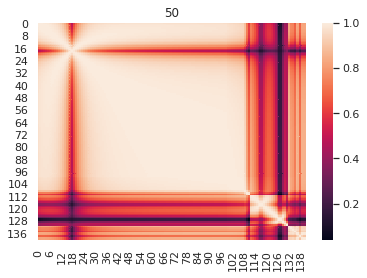

[ 4.79841921 17.13021941 30.45632313 64.69253876 98.61204463]
torch.Size([141, 150])


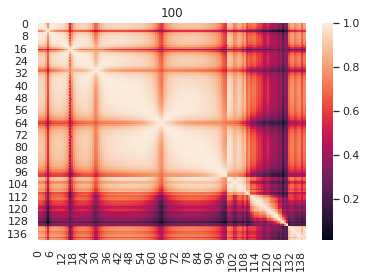

[95.92726149 90.37209381 85.50253274 80.2501409  73.4637246  69.14222047
 65.11415274 60.29225239 55.29589712 50.28909966 45.6902655  40.16568702
 38.07870336 34.24579517 30.5261796  27.57869097 25.2015026  23.7352723
 21.74721298 20.03740576 19.00696956 17.96968836 16.74034507 15.29184214
 14.01990933 13.02059233 12.40923376 11.97986808 11.09871158 10.60696694
  9.99411653  8.97532041  7.66386469  6.91456189  5.89304846  5.01956209
  3.97229771  3.05600268  1.97972301  1.11639742  0.44353614]
torch.Size([141, 150])


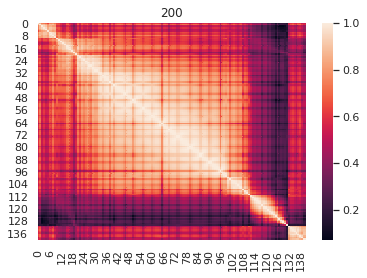

[2.20268660e-01 1.50607025e-01 1.11416445e-01 9.02012012e-02
 3.76730120e-01 4.11673176e-01 4.00160702e-01 3.92249690e-01
 4.44541987e-01 6.71471932e-01 6.98874028e-01 7.65787445e-01
 8.01798869e-01 8.51313840e-01 9.93903450e-01 9.99927411e-01
 1.02016387e+00 1.06444030e+00 9.77755466e-01 9.34925680e-01
 9.00668102e-01 7.40130163e-01 5.92673603e-01 3.38733978e-01
 1.41585862e-02 7.52311958e-02 1.22899373e-01 1.09817175e-01
 1.00063451e-01 6.25361235e-02 2.22723729e-02 6.55828110e-03
 1.03554578e-04 9.96209001e-03 1.43811426e-01 1.65620995e-01
 1.86622069e-01 2.02666649e-01 2.55990641e-01 3.32463594e-01
 3.52349941e-01 3.13059294e-01 2.41799856e-01 1.40511785e-01
 5.20595474e-02 4.00228059e-02 2.68304200e+01 2.95622418e+01
 3.25307440e+01 3.75184176e+01 4.27063583e+01 4.61801903e+01
 4.97233891e+01 5.54190930e+01 5.95093282e+01 6.93446948e+01
 7.60880940e+01 8.23795541e+01 8.63419734e+01 9.51852623e+01
 9.13323665e+01 7.97117730e+01 6.56364376e+01 5.20890244e+01
 4.00825321e+01 3.525906

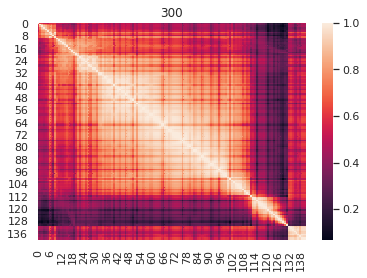

[8.57421701e-02 2.55293342e-01 5.34440899e-01 9.72506619e-01
 1.13929329e+00 1.25257256e+00 1.30044533e+00 1.44698682e+00
 1.50063990e+00 1.58040021e+00 1.78299694e+00 1.69307141e+00
 1.40732599e+00 1.33133780e+00 1.19867607e+00 1.10728229e+00
 1.05740692e+00 1.00998520e+00 9.99540576e-01 9.94641873e-01
 8.71121515e-01 3.99273317e-01 2.39735887e-01 5.01179356e-01
 6.97556483e-01 5.44008905e-01 3.81446221e-01 4.89882236e-01
 5.00000000e-01 5.00006343e-01 5.16538197e-01 6.16803652e-01
 6.90036958e-01 5.33776689e-01 6.44873961e-01 1.73688202e-01
 3.67654120e-02 1.00100844e-02 2.35808210e-03 2.23345152e-04
 1.93605933e-07 1.04397792e-03 4.21702932e-02 6.24261534e-01
 8.45564479e-01 2.56038431e-01 9.03097198e-02 7.86215613e-02
 3.00170613e-03 7.52618980e-01 8.14787333e-01 7.89966664e-01
 3.99421696e-01 3.35155116e-01 1.20231611e-01 1.87014323e-01
 3.73512891e-01 5.95897321e-01 6.06295227e-01 3.94943755e-01
 3.61612699e-01 7.60298274e-01 7.68397371e-01 5.88095717e-01
 5.95984295e-01 3.572565

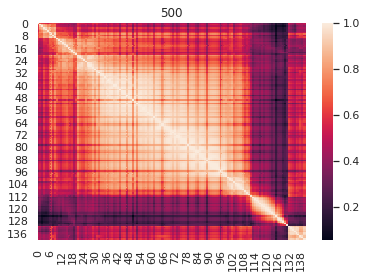

In [73]:
prototype_size = ['50', '100', '200', '300', '500']
res = {}

# fig = plt.figure(0)
# fig.set_figheight(7)
# fig.set_figwidth(21)
# count = 1
for sz in prototype_size:
    
#     idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/idx2vec_o_epoch5.dat'.format(sz),'rb'))
#     idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/idx2vec_i_epoch5.dat'.format(sz),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/trained_prototypes_epoch5.dat'.format(sz),'rb'))
    prototypes = trained_prototypes['prototypes']
    a = prototypes[prototypes<100]
    a = a[a > 0]
    print(a)
    
    prototypes2vec_i = trained_prototypes['i_embedding']
    prototypes2vec_o = trained_prototypes['o_embedding']

    transformed_protp = t.tensor(t.from_numpy(prototypes), dtype=t.float32).apply_(weighted_log).view(-1,1)
    prototype_weights = get_numeral_embed_weights_batch(t.tensor(t.from_numpy(numerals),dtype=t.float),transformed_protp)
    numeral_embed_i = t.matmul(prototype_weights.transpose(0,1),t.from_numpy(prototypes2vec_i))
    numeral_embed_o = t.matmul(prototype_weights.transpose(0,1),t.from_numpy(prototypes2vec_o))
    
    # i x i
    print(numeral_embed_i.shape)
    mat = t.matmul(numeral_embed_i, numeral_embed_i.transpose(0,1))
    denominator = t.matmul(t.norm(numeral_embed_i, dim=1).view(-1,1),t.norm(numeral_embed_i, dim=1).view(1,-1))
    cosine_sim = t.div(mat, denominator).numpy()
    
    plt.title(sz)
    sns.heatmap(cosine_sim)
    plt.show()
    

[2.61664644e+01 2.81720701e+01 3.04961883e+01 3.55103826e+01
 3.79308518e+01 4.24055623e+01 4.51012644e+01 4.99998423e+01
 6.03628163e+01 6.96484965e+01 8.29698807e+01 9.17392862e+01
 9.51914297e+01 8.79598020e+01 7.92046821e+01 7.51493241e+01
 6.48926658e+01 5.74751627e+01 5.36002542e+01 4.72665637e+01
 3.97420701e+01 3.24899343e+01 2.70859121e+01 2.49798957e+01
 2.38570889e+01 2.20266240e+01 2.09723914e+01 2.00020211e+01
 1.81849190e+01 1.70117758e+01 9.80066938e+00 5.05439043e+00
 7.88371737e+00 9.50443245e+00 1.00162595e+01 1.09621619e+01
 1.22677949e+01 1.40797961e+01 1.50046801e+01 1.59150081e+01
 1.30303135e+01 1.20235833e+01 1.13462115e+01 8.67718133e+00
 6.96972407e+00 5.95009525e+00 5.02385353e+00 4.01045267e+00
 3.44342815e+00 2.84877203e+00 2.49730787e+00 2.01839062e+00
 1.53738103e+00 9.87664710e-01 5.68998559e-01 4.02840911e-02]
torch.Size([141, 300])


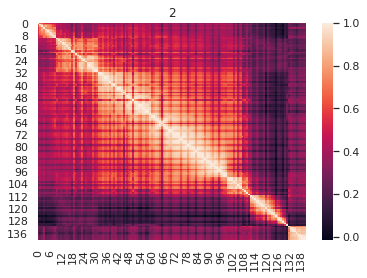

In [8]:
prototype_size = ['2']
res = {}

# fig = plt.figure(0)
# fig.set_figheight(7)
# fig.set_figwidth(21)
# count = 1
for sz in prototype_size:
    
#     idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/idx2vec_o_epoch5.dat'.format(sz),'rb'))
#     idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/idx2vec_i_epoch5.dat'.format(sz),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B/prototypes/{}/trained_prototypes_epoch1_{}00_1.0.dat'.format(sz, sz),'rb'))
    prototypes = trained_prototypes['prototypes']
    a = prototypes[prototypes<100]
    a = a[a > 0]
    print(a)
    
    prototypes2vec_i = trained_prototypes['i_embedding']
    prototypes2vec_o = trained_prototypes['o_embedding']

    transformed_protp = t.tensor(t.from_numpy(prototypes), dtype=t.float32).apply_(weighted_log).view(-1,1)
    prototype_weights = get_numeral_embed_weights_batch(t.tensor(t.from_numpy(numerals),dtype=t.float),transformed_protp)
    numeral_embed_i = t.matmul(prototype_weights.transpose(0,1),t.from_numpy(prototypes2vec_i))
    numeral_embed_o = t.matmul(prototype_weights.transpose(0,1),t.from_numpy(prototypes2vec_o))
    
    # i x i
    print(numeral_embed_i.shape)
    mat = t.matmul(numeral_embed_i, numeral_embed_i.transpose(0,1))
    denominator = t.matmul(t.norm(numeral_embed_i, dim=1).view(-1,1),t.norm(numeral_embed_i, dim=1).view(1,-1))
    cosine_sim = t.div(mat, denominator).numpy()
    
    plt.title(sz)
    sns.heatmap(cosine_sim)
    plt.show()
    

torch.Size([141, 150])


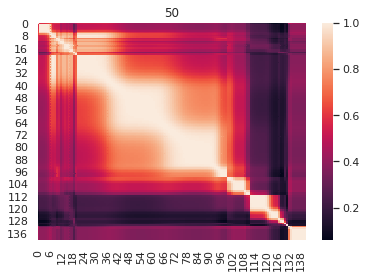

torch.Size([141, 150])


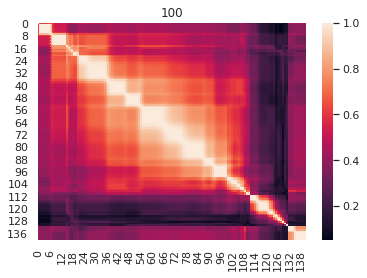

torch.Size([141, 150])


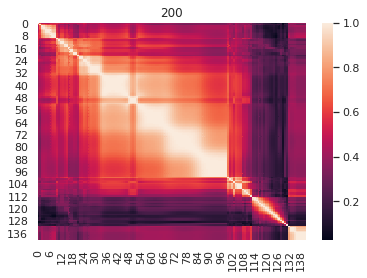

torch.Size([141, 150])


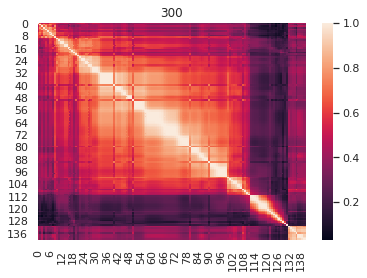

torch.Size([141, 150])


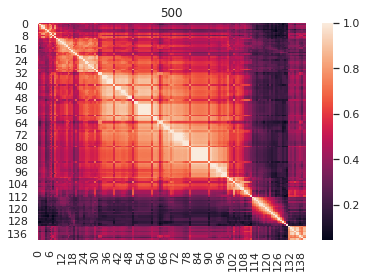

In [74]:
gmms = ['50', '100', '200','300', '500']

for gmm_name in gmms:
    
    idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd/idx2vec_o_epoch5.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd/idx2vec_i_epoch5.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd/trained_gmms_epoch5_{}.dat'.format(gmm_name, gmm_name),'rb'))
    
    gmm = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/gmm/gmm-{}-rd.dat'.format(gmm_name),'rb'))
    prototype_weights = gmm.predict_proba(numerals.reshape(-1,1))
    
    prototypes2vec_i = trained_prototypes['i_embedding']
    prototypes2vec_o = trained_prototypes['o_embedding']
    numeral_embed_i = t.from_numpy(np.matmul(prototype_weights, prototypes2vec_i)) # (93, 150)
    numeral_embed_o = t.from_numpy(np.matmul(prototype_weights, prototypes2vec_o)) # (93, 150)
    
    # i x i
    print(numeral_embed_i.shape)
    mat = t.matmul(numeral_embed_i, numeral_embed_i.transpose(0,1))
    denominator = t.matmul(t.norm(numeral_embed_i, dim=1).view(-1,1),t.norm(numeral_embed_i, dim=1).view(1,-1))
    cosine_sim = t.div(mat, denominator).numpy()
    
    plt.title(gmm_name)
    sns.heatmap(cosine_sim)
    plt.show()